In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import invgamma
from scipy.stats import norm
import scipy.stats as stats

In [18]:
# set the initial parameters
mu0 = 0
sigma0 = 1
n = 10
alpha = 1
beta = 1

# generate mu with normal distribution
mu = np.random.normal(mu0, sigma0)

# generate sigma with inverse gamma distribution
variance = invgamma(alpha, scale = beta).rvs()

# generate x by the mu and sigma above
x_set = np.random.normal(mu, np.sqrt(variance), n)

# calculate the initial parameters
mu1 = ((sum(x_set) / variance) + (mu0 / (sigma0 ** 2))) / ((n / variance) + (1 / (sigma0 ** 2)))
sigma1 = 1 / ((n / variance) + (1 / (sigma0 ** 2)))
alpha_n = alpha + n / 2
beta1 = beta + 0.5 * sum((x_set - mu) ** 2)

print(mu1, sigma1)

0.09556562959823643 0.19006642995484166


In [19]:
def mu_n(var):
    return ((sum(x_set) / var) + (mu0 / (sigma0 ** 2))) / ((n / var) + (1 / (sigma0 ** 2)))

def sigma_n(var):
    return 1 / ((n / var) + (1 / (sigma0 ** 2)))

def beta_n(mu):
    return beta + 0.5 * sum((x_set - mu) ** 2)

In [32]:
mu_set = [mu1]
sigma_set = [sigma1]

n = 10000
for i in range(0, n):
    
    # given sigma suqare and then generating mu
    x = np.random.normal(mu_n(sigma_set[i]), np.sqrt(sigma_n(sigma_set[i])))
    mu_set.append(x)

    # given mu and then generating sigma square
    y = invgamma(alpha_n, scale = beta_n(mu_set[i])).rvs()
    sigma_set.append(y)

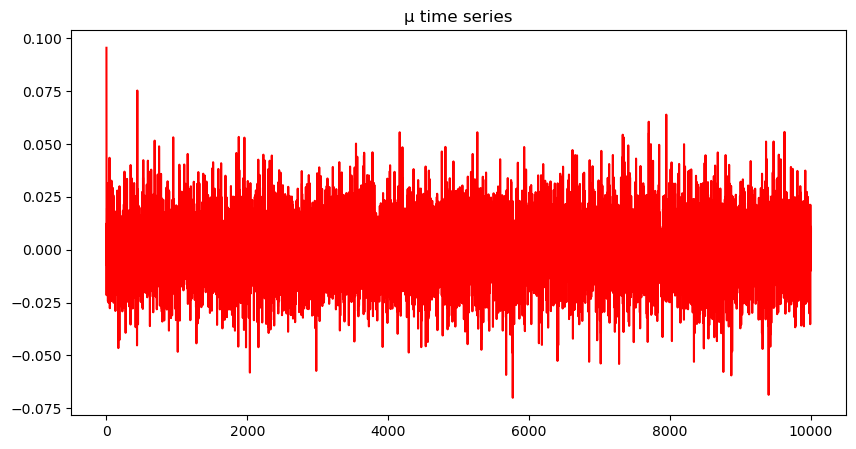

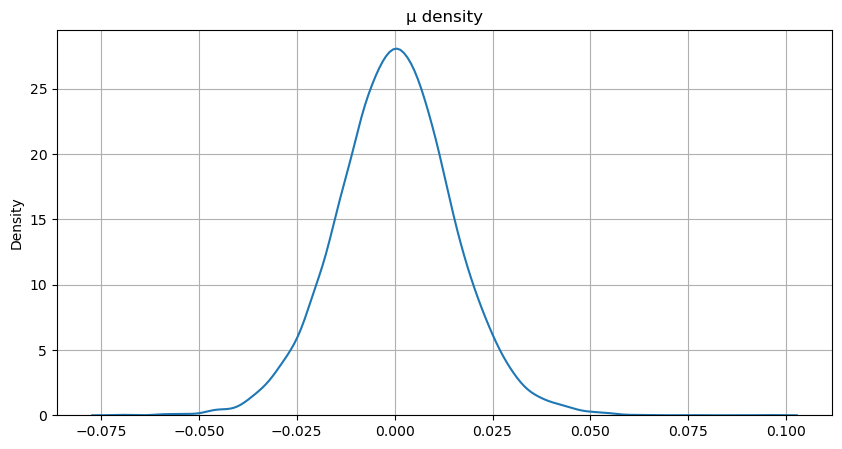

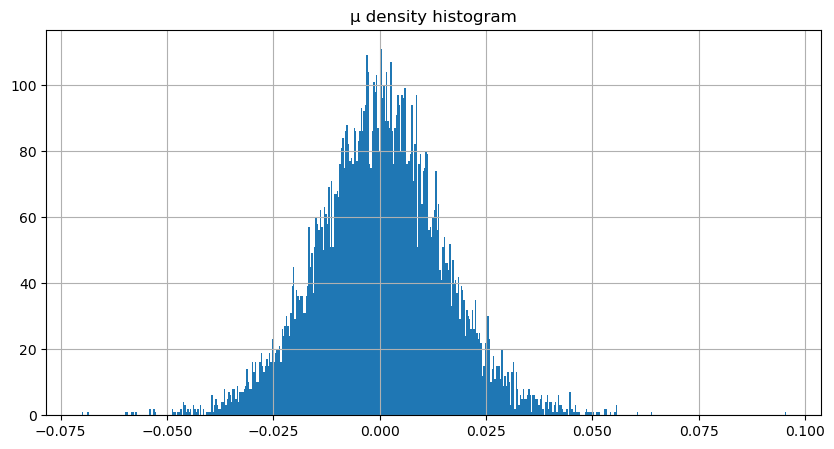

In [33]:
plt.figure(figsize = (10, 5))
plt.title('µ time series')
plt.plot(mu_set, 'r')
plt.show()

plt.figure(figsize = (10, 5))
plt.title('µ density')
sns.kdeplot(mu_set)
plt.grid(True)
plt.show()

plt.figure(figsize = (10, 5))
plt.title('µ density histogram')
plt.hist(mu_set, bins = 500)
plt.grid(True)
plt.show()

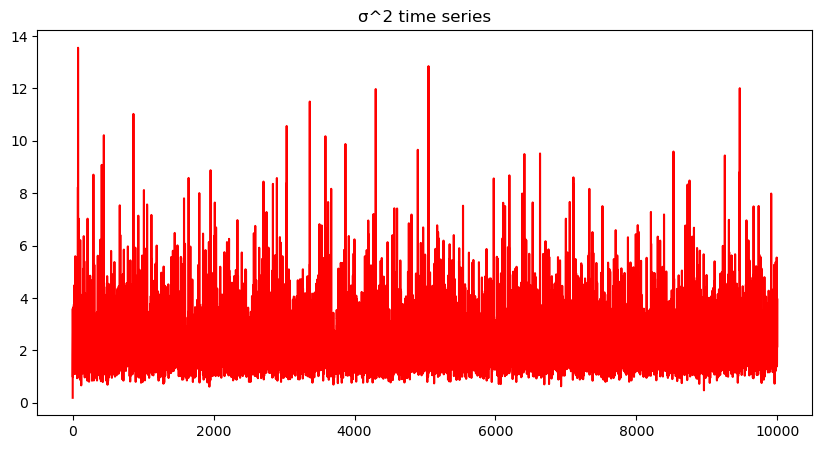

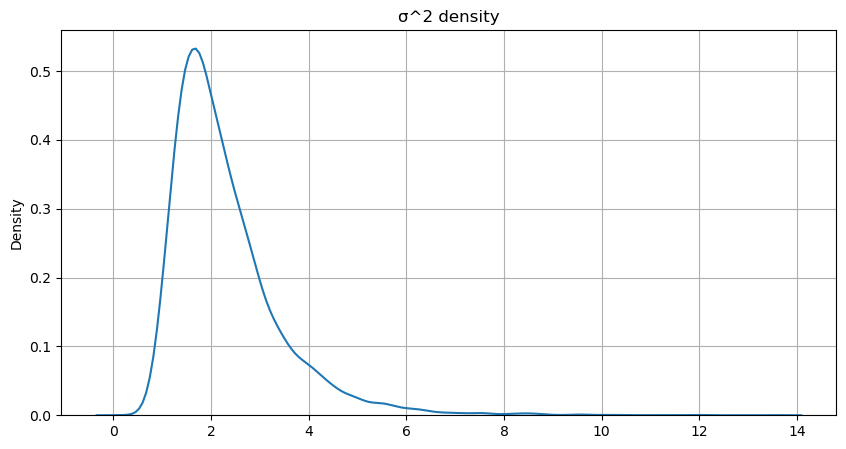

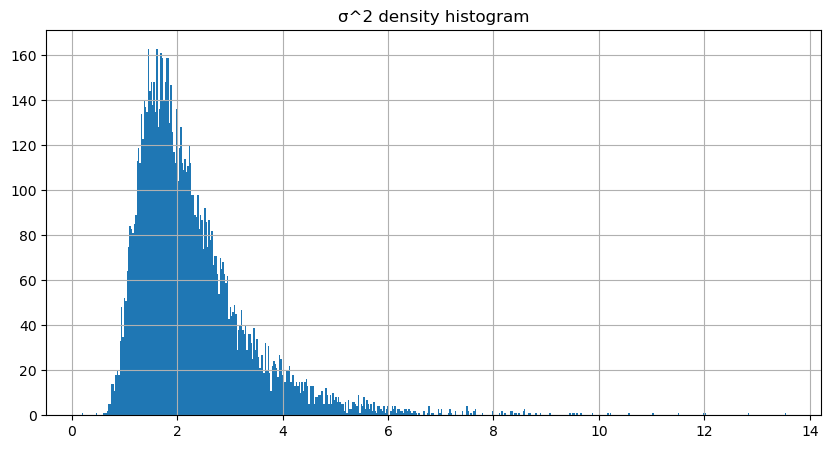

In [34]:
plt.figure(figsize = (10, 5))
plt.title('σ^2 time series')
plt.plot(sigma_set, 'r')
plt.show()

plt.figure(figsize = (10, 5))
plt.title('σ^2 density')
sns.kdeplot(sigma_set)
plt.grid(True)
plt.show()

plt.figure(figsize = (10, 5))
plt.title('σ^2 density histogram')
plt.hist(sigma_set, bins = 500)
plt.grid(True)
plt.show()

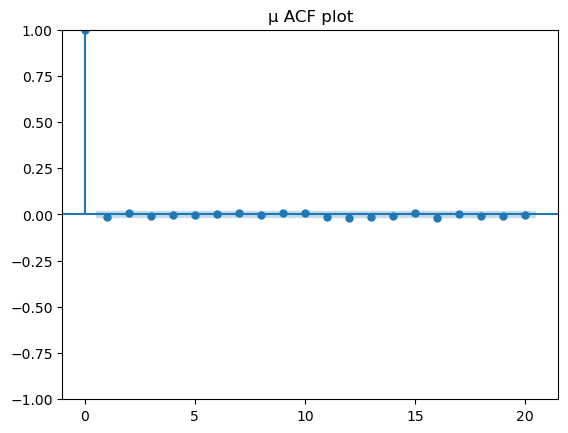

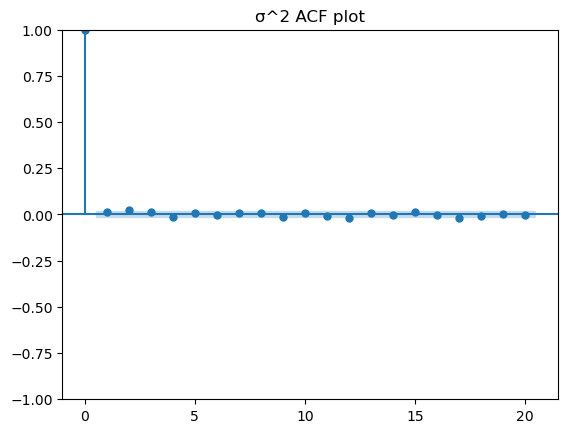

In [38]:
plot_acf(np.array(mu_set), lags = 20)
plt.title('µ ACF plot')
plt.show()

plot_acf(np.array(sigma_set), lags = 20)
plt.title('σ^2 ACF plot')
plt.show()